# Project7 - Bank Churn Prediction

## Problem statement

* Businesses like banks that provide service have to worry about the problem of 'Churn' i.e. customers leaving and joining another service provider.

* Management needs to understand which aspects of the service influence the customer's decisions so that they can improve the service.

## Objective

* Given a Bank customer, build a neural network-based classifier that can determine whether they will leave or not.

## Data

**bank.csv**

* CustomerId: Unique ID which is assigned to each customer
* Surname: Last name of the customer 
* CreditScore: It defines the credit history of the customer.  
* Geography: A customer’s location    
* Gender: It defines the Gender of the customer   
* Age: Age of the customer     
* Tenure: Number of years for which the customer has been with the bank
* NumOfProducts: It refers to the number of products that a customer has purchased through the bank.
* Balance: Account balance
* HasCrCard: It is a categorical variable that decides whether the customer has a credit card or not.
* EstimatedSalary: Estimated salary 
* isActiveMember: It is a categorical variable that decides whether the customer is an active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions, etc )
* Exited: It is a categorical variable that decides whether the customer left the bank within six months or not. It can take two values
        0=No ( Customer did not leave the bank )
        1=Yes ( Customer left the bank )



## Loading libraries

In [1]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd
import random

# Libraries to help with data visualization
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns


# Libraries for data pre-processing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder


# Libraries to tune model, get different metric scores and split data
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn import metrics

from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    classification_report,
    plot_confusion_matrix,
    make_scorer,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
)

from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Libraries to build ANN models using tensorflow
import tensorflow as tf
from tensorflow.keras import backend
from tensorflow.keras import losses
from tensorflow.keras import optimizers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout, BatchNormalization
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop

from keras import callbacks
from keras.callbacks import ModelCheckpoint

warnings.filterwarnings("ignore")

<IPython.core.display.Javascript object>

## Loading and exploring the dataset

### Read the dataset.

In [2]:
raw_data = pd.read_csv("bank.csv")

<IPython.core.display.Javascript object>

In [3]:
# copying data to another varaible to avoid any changes to original data
df = raw_data.copy()

<IPython.core.display.Javascript object>

In [4]:
# checking the shape of the data
df.shape

(10000, 14)

<IPython.core.display.Javascript object>

* The dataset has 10000 rows and 14 columns

### Data Overview

#### View the first, last and random 5 rows of the dataset.

In [5]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


<IPython.core.display.Javascript object>

In [6]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


<IPython.core.display.Javascript object>

In [7]:
df.sample(n=5, random_state=1)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9953,9954,15655952,Burke,550,France,Male,47,2,0.00,2,1,1,97057.28,0
3850,3851,15775293,Stephenson,680,France,Male,34,3,143292.95,1,1,0,66526.01,0
4962,4963,15665088,Gordon,531,France,Female,42,2,0.00,2,0,1,90537.47,0
3886,3887,15720941,Tien,710,Germany,Male,34,8,147833.30,2,0,1,1561.58,0
5437,5438,15733476,Gonzalez,543,Germany,Male,30,6,73481.05,1,1,1,176692.65,0


<IPython.core.display.Javascript object>

#### Check duplicates.

In [8]:
df["CustomerId"].value_counts().sort_values()

15634602    1
15788218    1
15619304    1
15701354    1
15737888    1
           ..
15569266    1
15719294    1
15606229    1
15589329    1
15628319    1
Name: CustomerId, Length: 10000, dtype: int64

<IPython.core.display.Javascript object>

In [9]:
# check dupilcates without RowNumber & CustomerId
df.drop(["RowNumber", "CustomerId"], axis=1).duplicated().sum()  ## no data change

0

<IPython.core.display.Javascript object>

* No duplicate was found.

#### Check the data types of the columns for the dataset.

In [10]:
# checking column datatypes and number of non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


<IPython.core.display.Javascript object>

In [11]:
# check for missing values in the data
round(df.isnull().sum() / df.isnull().count() * 100, 2)

RowNumber          0.0
CustomerId         0.0
Surname            0.0
CreditScore        0.0
Geography          0.0
Gender             0.0
Age                0.0
Tenure             0.0
Balance            0.0
NumOfProducts      0.0
HasCrCard          0.0
IsActiveMember     0.0
EstimatedSalary    0.0
Exited             0.0
dtype: float64

<IPython.core.display.Javascript object>

* There are no missing values in the data.
* `RowNumber`,`CustomerId` and `Surname` were decided to be deleted because they do not have the information for the model.

In [12]:
df.drop(["RowNumber", "CustomerId", "Surname"], axis=1, inplace=True)

<IPython.core.display.Javascript object>

#### Check for categorical variables

In [13]:
df["Geography"].value_counts(1)

France     0.5014
Germany    0.2509
Spain      0.2477
Name: Geography, dtype: float64

<IPython.core.display.Javascript object>

#### Summary of the dataset.

In [14]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,NaN,NaN,NaN,650.5288,96.653299,350.0,584.0,652.0,718.0,850.0
Geography,10000,3,France,5014,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,10000,2,Male,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,10000.0,NaN,NaN,NaN,38.9218,10.487806,18.0,32.0,37.0,44.0,92.0
Tenure,10000.0,NaN,NaN,NaN,5.0128,2.892174,0.0,3.0,5.0,7.0,10.0
Balance,10000.0,NaN,NaN,NaN,76485.889288,62397.405202,0.0,0.0,97198.54,127644.24,250898.09
NumOfProducts,10000.0,NaN,NaN,NaN,1.5302,0.581654,1.0,1.0,1.0,2.0,4.0
HasCrCard,10000.0,NaN,NaN,NaN,0.7055,0.45584,0.0,0.0,1.0,1.0,1.0
IsActiveMember,10000.0,NaN,NaN,NaN,0.5151,0.499797,0.0,0.0,1.0,1.0,1.0
EstimatedSalary,10000.0,NaN,NaN,NaN,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48


<IPython.core.display.Javascript object>

* The average of `CreditScore` is 650.
* The average of `Age` is 39.
* The average of `Tenure` is 5.
* The average of `Balance` is 76485 and the median is 97198.
* The average of `NumOfProducts` is 1.5.
* The average of `EstimatedSalary` is 100090.

In [15]:
# check unique values in categorical values
categorical_col_names = df.select_dtypes(include="object").columns.to_list()
for col_name in categorical_col_names:
    print("## %s ##" % col_name)
    print(df[col_name].value_counts(1))
    print("-" * 15)

## Geography ##
France     0.5014
Germany    0.2509
Spain      0.2477
Name: Geography, dtype: float64
---------------
## Gender ##
Male      0.5457
Female    0.4543
Name: Gender, dtype: float64
---------------


<IPython.core.display.Javascript object>

### Binning

#### Age

In [16]:
df[["Age"]].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,10000.0,38.9218,10.487806,18.0,32.0,37.0,44.0,92.0


<IPython.core.display.Javascript object>

In [17]:
## Binning Age for EDA
df["Age_bin"] = pd.cut(
    df["Age"],
    bins=[18, 19, 29, 39, 49, 59, 69, 79, 92],
    labels=["Under20", "20s", "30s", "40s", "50s", "60s", "70s", "Above79"],
)

<IPython.core.display.Javascript object>

In [18]:
df[df["Age"] == 80]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_bin
310,652,France,Female,80,4,0.0,2,1,1,188603.07,0,Above79
3994,809,Spain,Male,80,8,0.0,2,0,1,34164.05,0,Above79
9490,624,France,Male,80,3,0.0,1,1,1,65801.44,0,Above79


<IPython.core.display.Javascript object>

## EDA - Univariate analysis

### Functions

In [19]:
def hist_box(data, feature, figsize=(12, 7), kde=False, bins=None):
    """

  show histogram & boxplot at once

  data : dataframe
  feature : column name
  figsize ; figure size (default (12,7))
  kde : whether to show density curve ( default false )
  bins : bin numbers ( default None)

  """

    fs, (ax_box, ax_hist) = plt.subplots(
        nrows=2, sharex=True, figsize=(12, 7), gridspec_kw={"height_ratios": (0.3, 0.7)}
    )
    sns.boxplot(data=data, ax=ax_box, x=feature, showmeans=True, color="violet")
    if bins:
        sns.histplot(data=data, ax=ax_hist, x=feature, bins=bins, kde=kde)
    else:
        sns.histplot(data=data, ax=ax_hist, x=feature, kde=kde)
    ax_hist.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  ## draw a green dotted line of mean
    ax_hist.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  ## draw a black straight line of median
    plt.show()

<IPython.core.display.Javascript object>

In [20]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None, rotation=90):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=rotation, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.2f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

### Observations on CreditScore

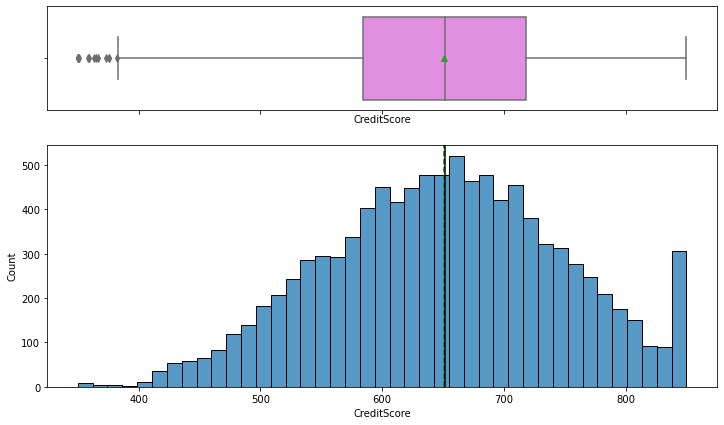

<IPython.core.display.Javascript object>

In [21]:
hist_box(df, "CreditScore")

* It seems that there is an upper limit on the credit score, and because of this, except for the high count near the max value, it generally shows a normal distribution.
* Some outliers outside the lower whisker were observed.

### Observations on Geography

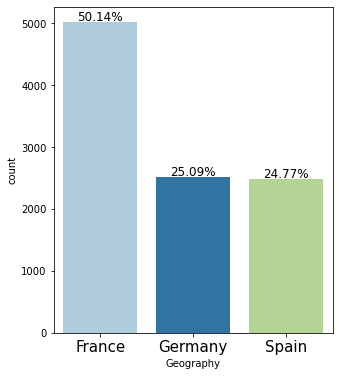

<IPython.core.display.Javascript object>

In [22]:
labeled_barplot(df, "Geography", perc=True, rotation=0)

* Customers in France are the largest at 50%, followed by Germany and Spain at about 25% each.

### Observations on Gender

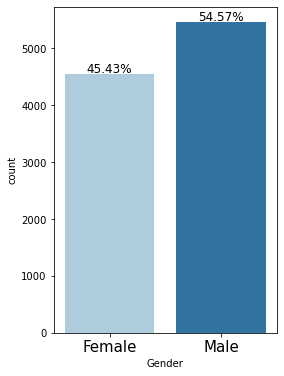

<IPython.core.display.Javascript object>

In [23]:
labeled_barplot(df, "Gender", perc=True, rotation=0)

* The proportion of male customers is 54.5%, higher than that of female customers.

### Observations on Age

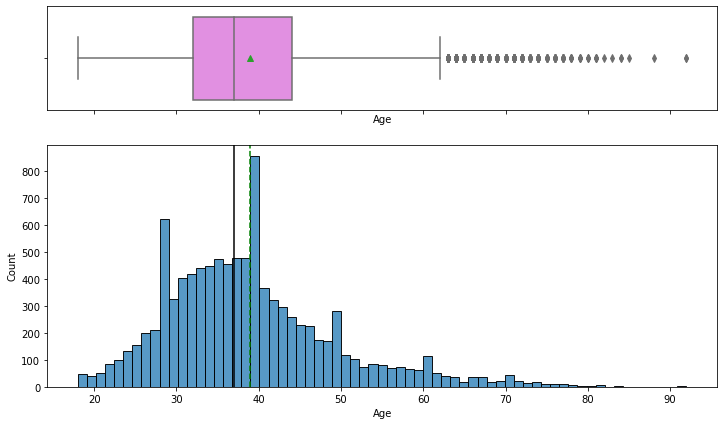

<IPython.core.display.Javascript object>

In [24]:
hist_box(df, "Age")

* A right-skewed distribution was observed.
* Many outliers outside the upper whisker were observed.

### Observations on Tenure

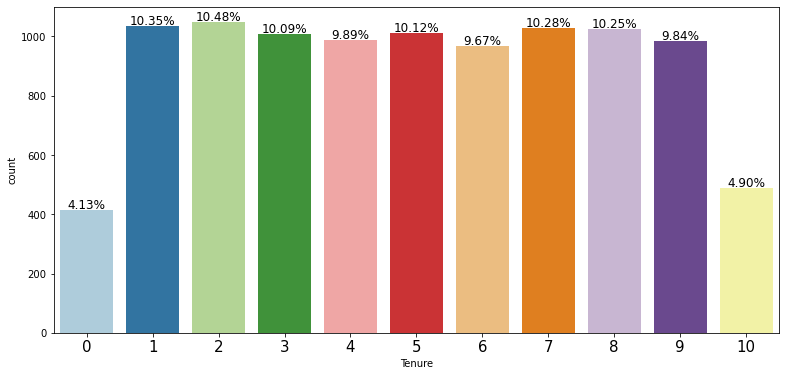

<IPython.core.display.Javascript object>

In [25]:
labeled_barplot(df, "Tenure", perc=True, rotation=0)

* Customers who have used the service for less than 1 year or 10 years are the lowest at 4.1% and 4.9%, respectively, and from 1 to 9 years, they are similar at around 10%.

### Observations on Balance

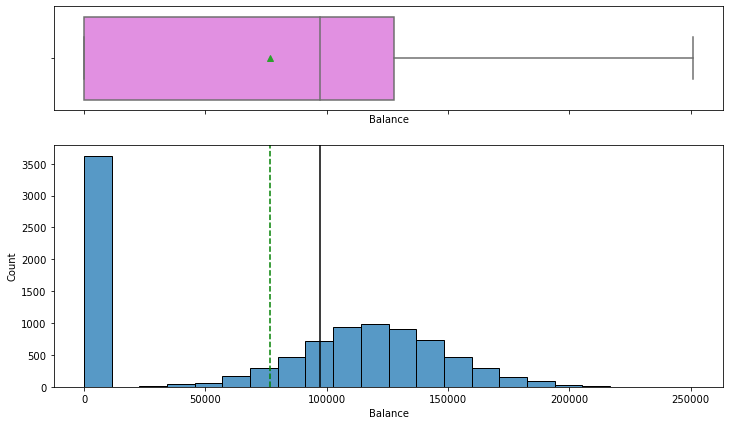

<IPython.core.display.Javascript object>

In [26]:
hist_box(df, "Balance")

* If 0 balance customers are excluded, the distribution appears to be normal, but the average and median values ​​are shifted because there are many 0 balance customers.


### Observations on NumOfProducts

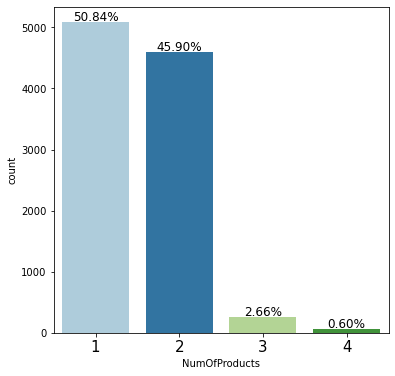

<IPython.core.display.Javascript object>

In [27]:
labeled_barplot(df, "NumOfProducts", perc=True, rotation=0)

* Most of the cases where customers purchased 1 or 2 products through the bank were relatively few, and 3 or 4 products were purchased.


### Observations on HasCrCard

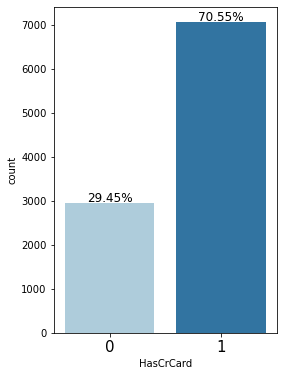

<IPython.core.display.Javascript object>

In [28]:
labeled_barplot(df, "HasCrCard", perc=True, rotation=0)

* 70% of customers have a credit card and the remaining 30% do not.

### Observations on IsActiveMember

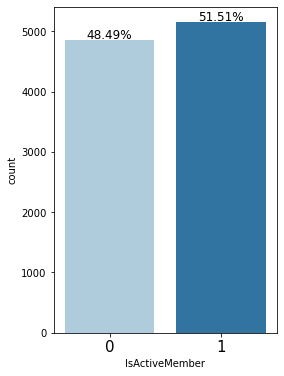

<IPython.core.display.Javascript object>

In [29]:
labeled_barplot(df, "IsActiveMember", perc=True, rotation=0)

* The percentage of active customers is 51.5%, slightly higher than those not active.

### Observations on EstimatedSalary

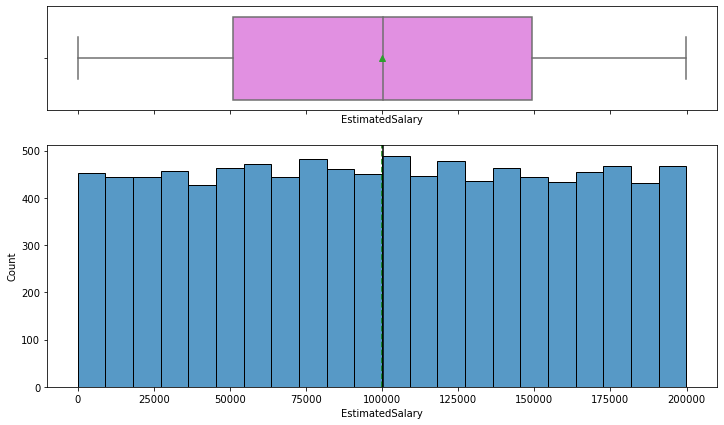

<IPython.core.display.Javascript object>

In [30]:
hist_box(df, "EstimatedSalary")

* A uniform distribution was observed.

### Observations on Exited

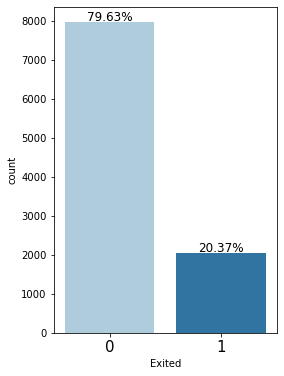

<IPython.core.display.Javascript object>

In [31]:
labeled_barplot(df, "Exited", perc=True, rotation=0)

* About 20% of customers left the bank and about 80% of customers did not.

## EDA - Bivariate analysis

### Functions

In [32]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target, bins="null"):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    #    try:

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    try:
        sns.histplot(
            data=data[data[target] == target_uniq[0]],
            bins=bins,
            x=predictor,
            kde=True,
            ax=axs[0, 0],
            color="teal",
            stat="density",
        )
    except:
        sns.histplot(
            data=data[data[target] == target_uniq[0]],
            x=predictor,
            kde=True,
            ax=axs[0, 0],
            color="teal",
            stat="density",
        )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    try:
        sns.histplot(
            data=data[data[target] == target_uniq[1]],
            bins=bins,
            x=predictor,
            kde=True,
            ax=axs[0, 1],
            color="orange",
            stat="density",
        )
    except:
        sns.histplot(
            data=data[data[target] == target_uniq[1]],
            x=predictor,
            kde=True,
            ax=axs[0, 1],
            color="orange",
            stat="density",
        )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )
    plt.tight_layout()
    plt.show()

<IPython.core.display.Javascript object>

In [33]:
# function to plot stacked bar chart


def stacked_barplot(
    data,
    predictor,
    target,
    legend=True,
    annot=False,
    rotation=0,
    xticksize=11,
    xlabsize=13,
):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    legend : show on/off legend
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    ax = tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))

    if legend == True:
        plt.legend(
            loc="lower left", frameon=False,
        )
        plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    elif legend == False:
        plt.legend([], [], frameon=False)
    plt.xticks(rotation=rotation, fontsize=xticksize)
    ax.set_xlabel(ax.get_xlabel(), size=xlabsize)
    plt.show()

<IPython.core.display.Javascript object>

In [34]:
# function to visualize 3 categorical variables with count plot


def splitted_countplot(data, predictor, target, hue=None, rotation=0):
    target_list = list(
        data[target].dropna().unique()
    )  # extract a list of unique value except NaN in target variables
    target_length = len(target_list)
    nrow_subplot = (target_length // 3) + 1
    fig_height = nrow_subplot * 4
    fig, ax = plt.subplots(nrow_subplot, 3, figsize=(12, fig_height))
    plt.subplots_adjust(hspace=0.3, wspace=0.3)

    # define extra subplot coord and delete it.
    for i in range(nrow_subplot):
        for j in range(3):
            if i * 3 + j + 1 > target_length:
                fig.delaxes(ax[i, j])
    # ------------------------------------------------

    for k, uniq_value in enumerate(target_list):
        row_index = k // 3  # for ax index
        col_index = k % 3  # for ax index
        subdata = data[
            data[target] == uniq_value
        ]  # generate subset of data including only one type of value in target variable
        subfig = sns.countplot(
            data=subdata, x=predictor, hue=hue, ax=ax[row_index, col_index]
        )
        subfig.set_xticklabels(subfig.get_xticklabels(), rotation=rotation)
        ax[row_index, col_index].set_title(uniq_value)
    plt.show()

<IPython.core.display.Javascript object>

### Pairplot

In [35]:
numerical_columns = [
    "CreditScore",
    "Age",
    "Tenure",
    "Balance",
    "NumOfProducts",
    "EstimatedSalary",
]
# sns.pairplot(df,hue="Exited",vars=numerical_columns,diag_kind="kde",kind="scatter",height=3.5,)
# plt.show()

<IPython.core.display.Javascript object>

### Correlation heatmap

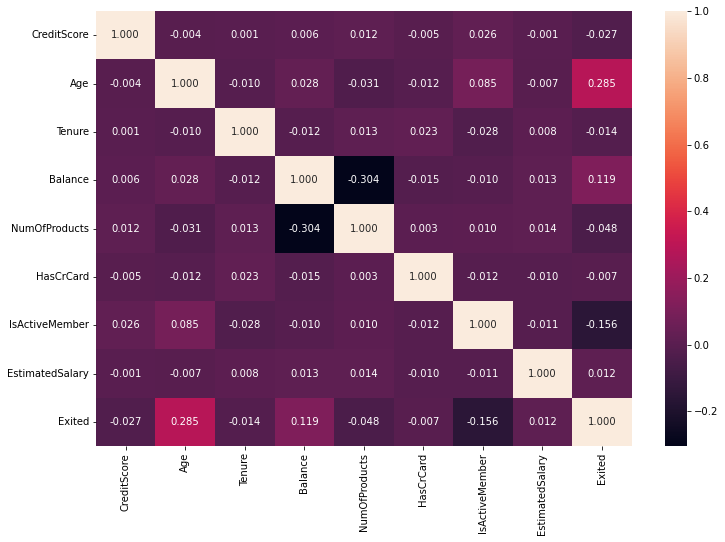

<IPython.core.display.Javascript object>

In [36]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt=".3f")
plt.show()

### Exited vs CreditScore

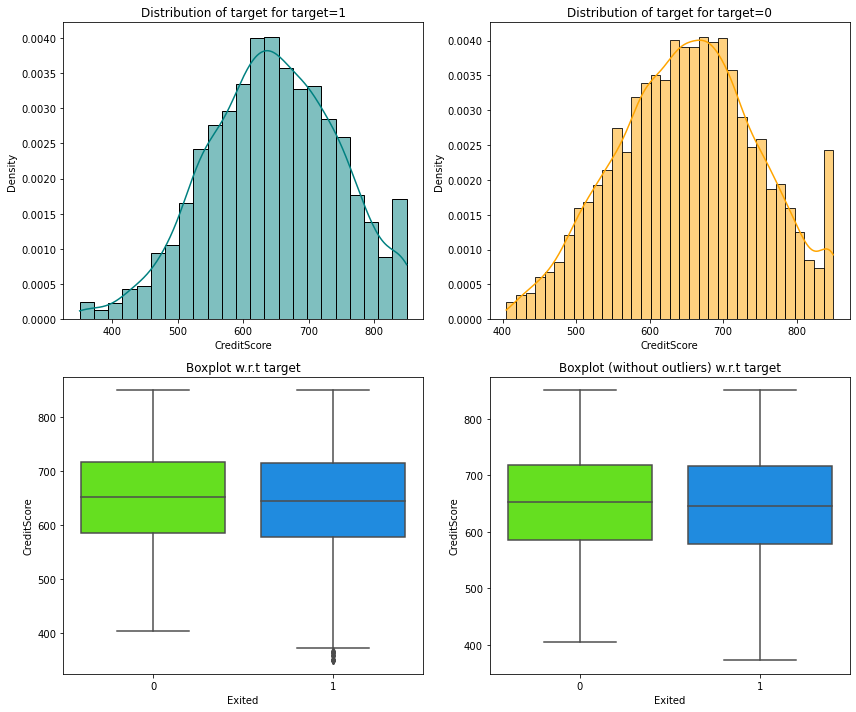

<IPython.core.display.Javascript object>

In [37]:
distribution_plot_wrt_target(df, "CreditScore", "Exited")

* There was no difference in whether customers left or not according to the credit score.

### Exited vs Geography

Exited        0     1    All
Geography                   
All        7963  2037  10000
Germany    1695   814   2509
France     4204   810   5014
Spain      2064   413   2477
------------------------------------------------------------------------------------------------------------------------


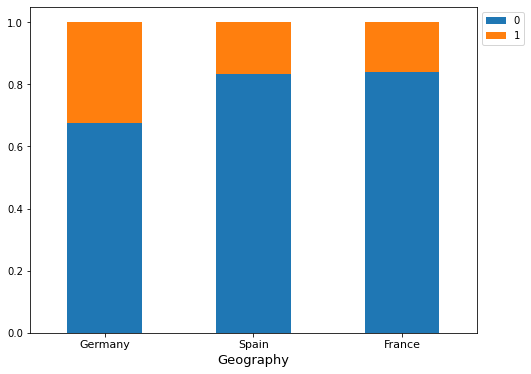

<IPython.core.display.Javascript object>

In [38]:
stacked_barplot(df, "Geography", "Exited")

* The churn rate of customers living in Germany is higher than that of customers living in other regions.

### Exited vs Gender

Exited     0     1    All
Gender                   
All     7963  2037  10000
Female  3404  1139   4543
Male    4559   898   5457
------------------------------------------------------------------------------------------------------------------------


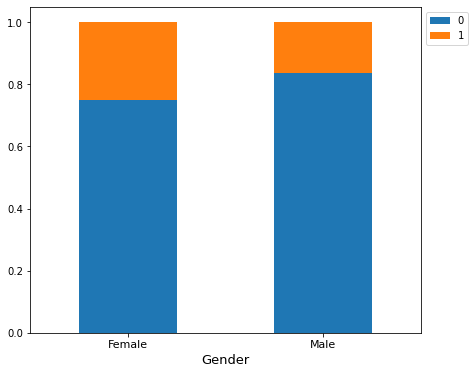

<IPython.core.display.Javascript object>

In [39]:
stacked_barplot(df, "Gender", "Exited")

* Female customers have a higher churn rate than male customers.

### Exited vs Age

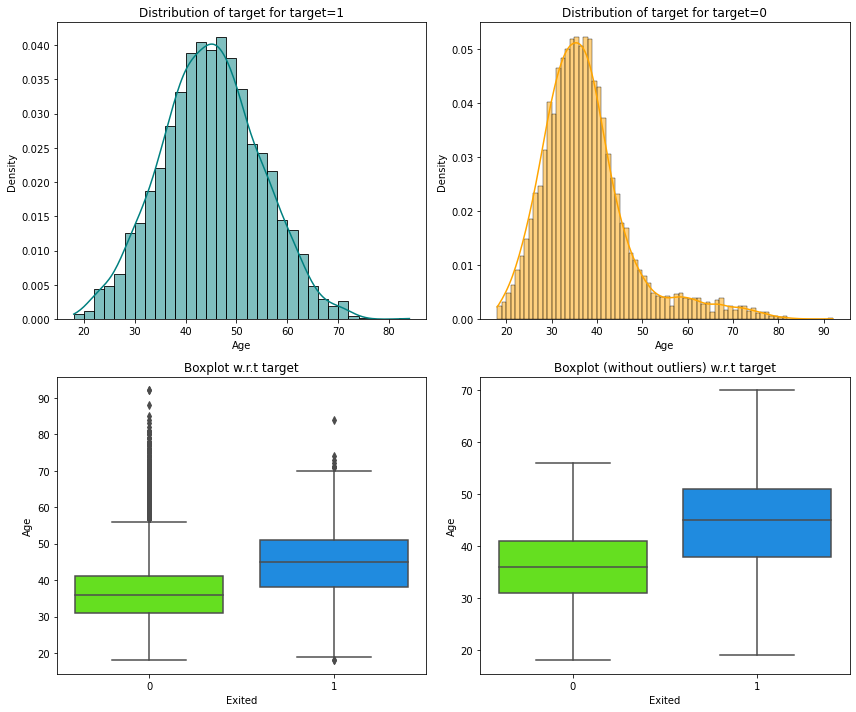

<IPython.core.display.Javascript object>

In [40]:
distribution_plot_wrt_target(df, "Age", "Exited")

Exited      0     1   All
Age_bin                  
All      7943  2035  9978
40s      1812   806  2618
50s       382   487   869
30s      3873   473  4346
60s       243   132   375
20s      1471   121  1592
70s       122    14   136
Under20    26     1    27
Above79    14     1    15
------------------------------------------------------------------------------------------------------------------------


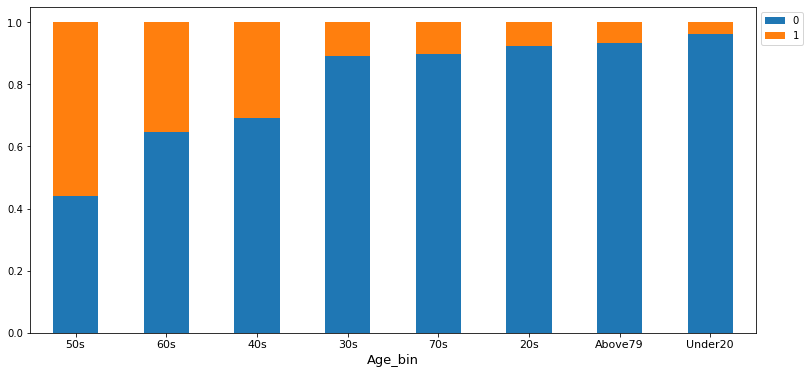

<IPython.core.display.Javascript object>

In [41]:
stacked_barplot(df, "Age_bin", "Exited")

* The bank churn rate of customers in their 40s and 60s was observed to be higher than that of other age groups. In particular, customers in their 50s had the highest churn rate.

### Exited vs Tenure

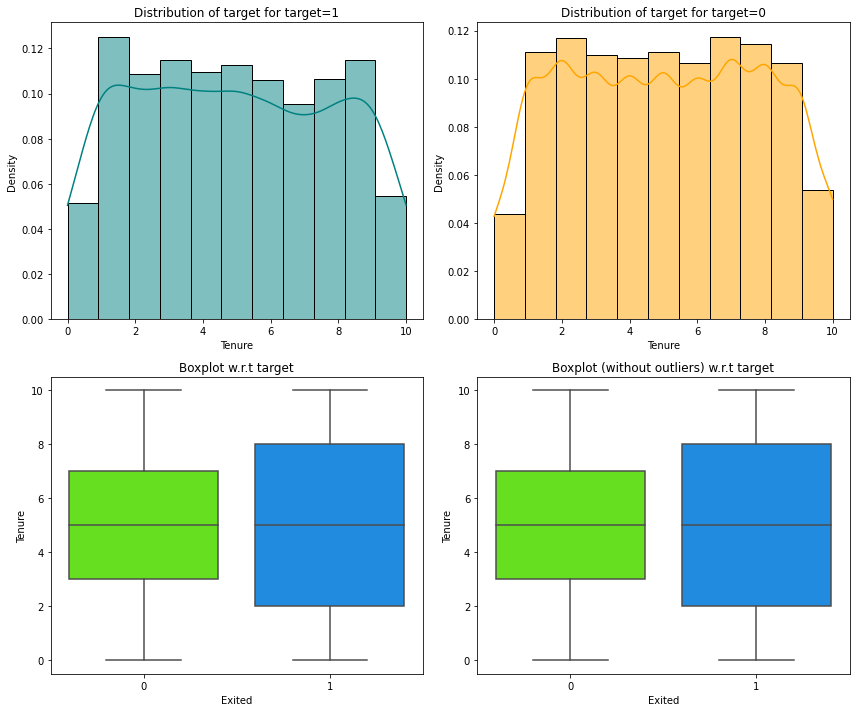

<IPython.core.display.Javascript object>

In [42]:
distribution_plot_wrt_target(df, "Tenure", "Exited", bins=11)

Exited     0     1    All
Tenure                   
All     7963  2037  10000
1        803   232   1035
3        796   213   1009
9        771   213    984
5        803   209   1012
4        786   203    989
2        847   201   1048
8        828   197   1025
6        771   196    967
7        851   177   1028
10       389   101    490
0        318    95    413
------------------------------------------------------------------------------------------------------------------------


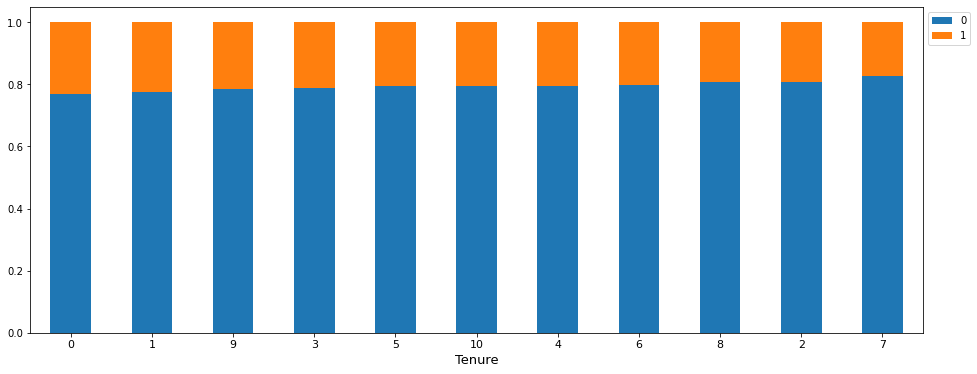

<IPython.core.display.Javascript object>

In [43]:
stacked_barplot(df, "Tenure", "Exited")

* It was observed that there was no correlation between the length of time a customer used the bank and whether or not they left the bank.

### Exited vs Balance

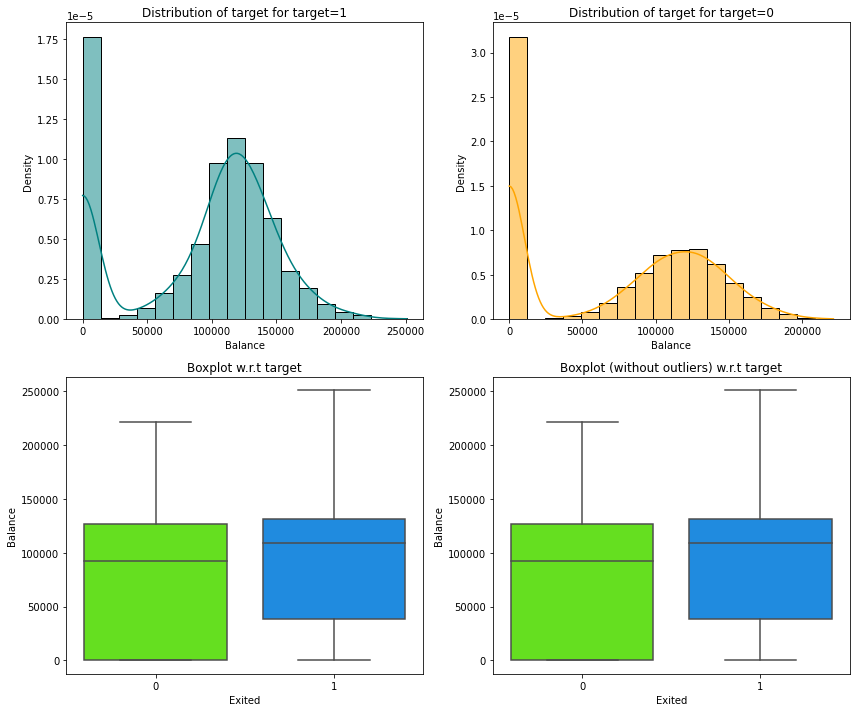

<IPython.core.display.Javascript object>

In [44]:
distribution_plot_wrt_target(df, "Balance", "Exited")

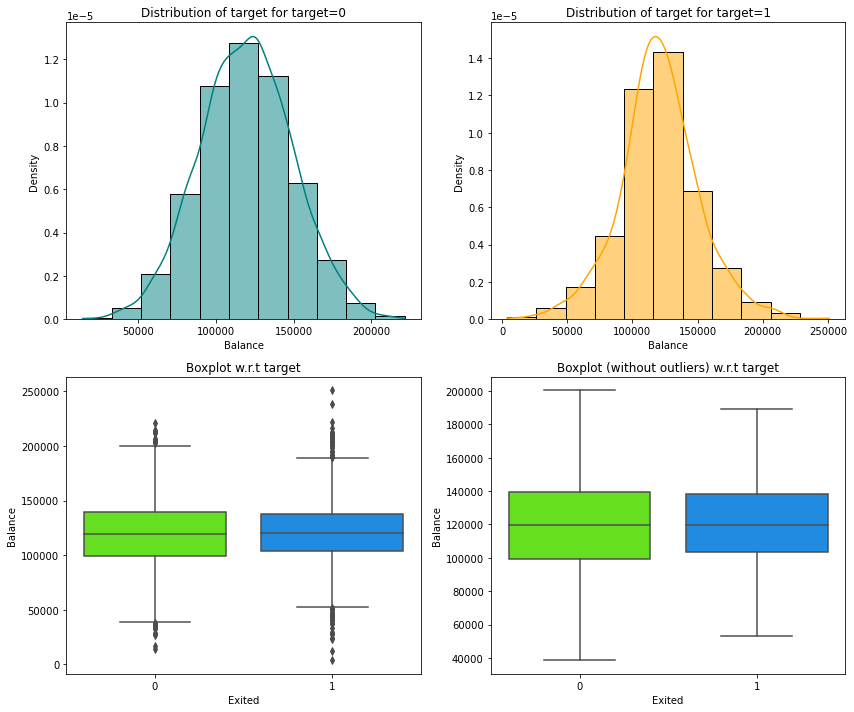

<IPython.core.display.Javascript object>

In [45]:
# Balance vs Exited without 0 balance
distribution_plot_wrt_target(df[df["Balance"] > 0], "Balance", "Exited", bins=11)

* No clear correlation was observed between customer account balance and churn rates.

### Exited vs NumOfProducts

Exited            0     1    All
NumOfProducts                   
All            7963  2037  10000
1              3675  1409   5084
2              4242   348   4590
3                46   220    266
4                 0    60     60
------------------------------------------------------------------------------------------------------------------------


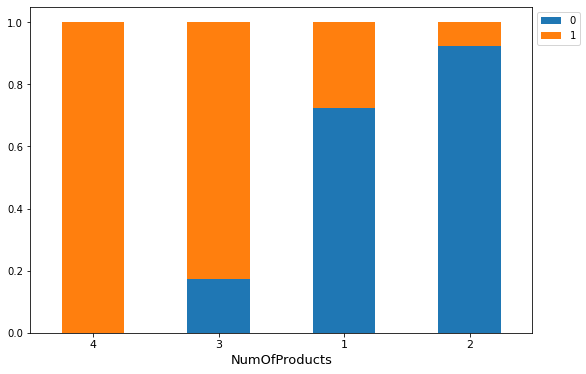

<IPython.core.display.Javascript object>

In [46]:
stacked_barplot(df, "NumOfProducts", "Exited")

* The churn rate of customers who purchased two or more bank products was high, and in particular, all customers who purchased 4 products churned.

### Exited vs HasCrCard

Exited        0     1    All
HasCrCard                   
All        7963  2037  10000
1          5631  1424   7055
0          2332   613   2945
------------------------------------------------------------------------------------------------------------------------


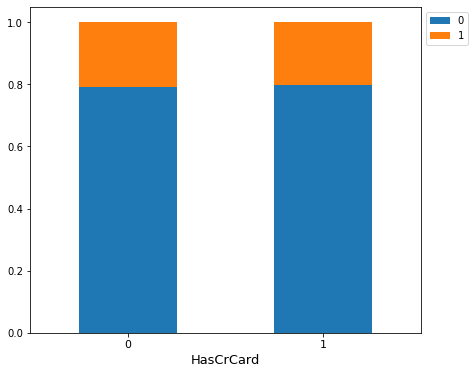

<IPython.core.display.Javascript object>

In [47]:
stacked_barplot(df, "HasCrCard", "Exited")

* No correlation was observed between the customer's card holding status and churn rates.

### Exited vs IsActiveMember

Exited             0     1    All
IsActiveMember                   
All             7963  2037  10000
0               3547  1302   4849
1               4416   735   5151
------------------------------------------------------------------------------------------------------------------------


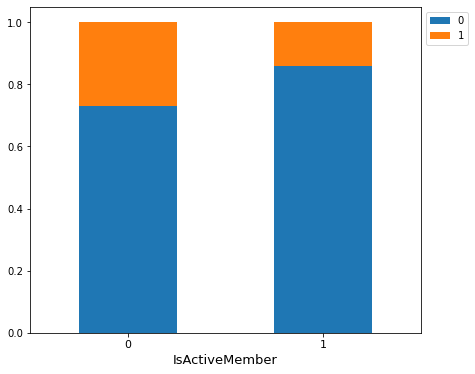

<IPython.core.display.Javascript object>

In [48]:
stacked_barplot(df, "IsActiveMember", "Exited")

* Not surprisingly, it was observed that the churn rate of active customers was lower.

### Exited vs EstimatedSalary

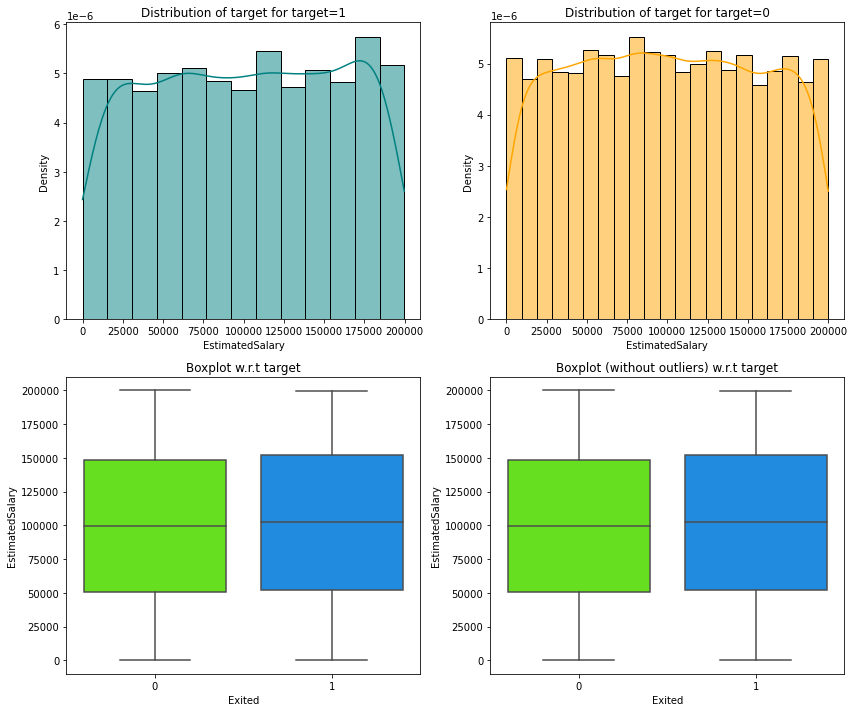

<IPython.core.display.Javascript object>

In [49]:
distribution_plot_wrt_target(df, "EstimatedSalary", "Exited")

* No correlation was observed between the customer's estimated salary and churn rates.

### Exited vs Geography vs Age

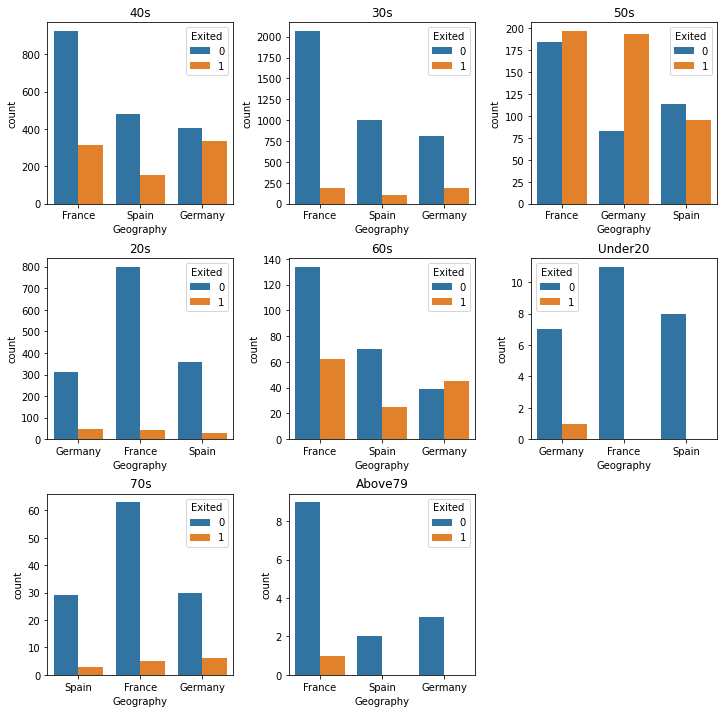

<IPython.core.display.Javascript object>

In [50]:
splitted_countplot(df, "Geography", "Age_bin", hue="Exited")

* A relatively high churn rate was observed for customers in their 40s and 60s residing in Germany.

### Exited vs IsActiveMember vs Age

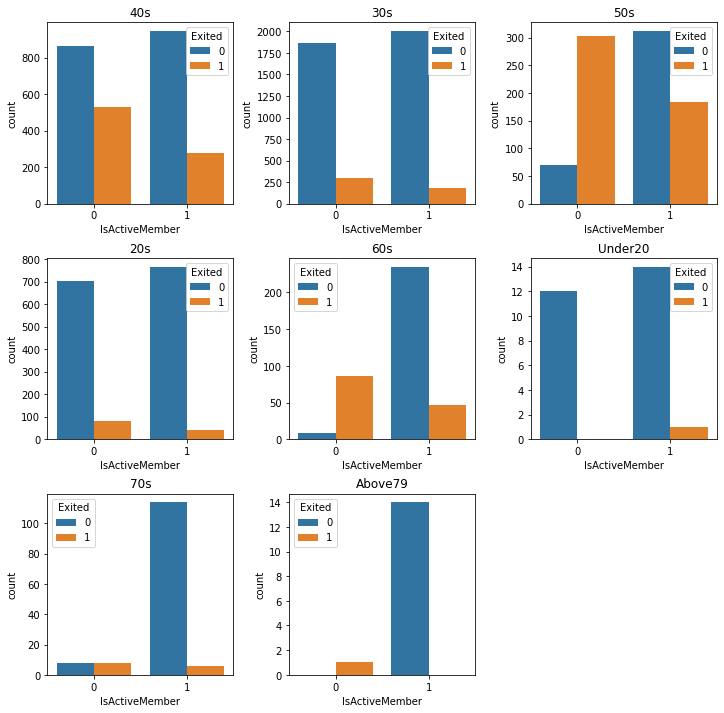

<IPython.core.display.Javascript object>

In [51]:
splitted_countplot(df, "IsActiveMember", "Age_bin", hue="Exited")

* Active bank churn was observed among inactive customers in their 50s and 60s.

## Key Observations from EDA

* The bank churn rate of customers living in Germany is higher than that of customers living in other regions.


* The bank churn rate of customers in their 40s and 60s was observed to be higher than that of other age groups. In particular, customers in their 50s had the highest churn rate.


* The bank churn rate of customers who purchased two or more bank products was high, and in particular, all customers who purchased 4 products churned.


* It was observed that the bank churn rate of inactive customers was higher, and active bank churn was observed among inactive customers in their 50s and 60s.

## Data pre-processing

### Defining dependent variables and independent variable.

* Through EDA, it was observed that `Age_bin` discriminates independent variable `Exited` rather than feature `Age`, so it was decided to use `Age_bin` instead of `Age`.

In [52]:
X_raw = df.drop(["Age", "Exited",], axis=1)
y = df["Exited"]

<IPython.core.display.Javascript object>

### Categorical encoding

* Since feature `NumOfProducts` consists only of numbers 1 to 4, it was decided to treat it as a categorical variable.

In [53]:
# change datatype
X_raw["NumOfProducts"] = X_raw["NumOfProducts"].astype("category")

X_onehot = pd.get_dummies(X_raw, drop_first=True)
X_onehot.head()

,CreditScore,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4,Age_bin_20s,Age_bin_30s,Age_bin_40s,Age_bin_50s,Age_bin_60s,Age_bin_70s,Age_bin_Above79
0,619,2,0.00,1,1,101348.88,0,0,0,0,0,0,0,0,1,0,0,0,0
1,608,1,83807.86,0,1,112542.58,0,1,0,0,0,0,0,0,1,0,0,0,0
2,502,8,159660.80,1,0,113931.57,0,0,0,0,1,0,0,0,1,0,0,0,0
3,699,1,0.00,0,0,93826.63,0,0,0,1,0,0,0,1,0,0,0,0,0
4,850,2,125510.82,1,1,79084.10,0,1,0,0,0,0,0,0,1,0,0,0,0


<IPython.core.display.Javascript object>

### Training, Validation and Test set

In [54]:
# Splitting data into training, validation and test set
X_temp, X_test, y_temp, y_test = train_test_split(
    X_onehot, y, test_size=0.1, random_state=1, stratify=y
)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.2, random_state=1, stratify=y_temp
)
print(X_train.shape, X_val.shape, X_test.shape)

(7200, 19) (1800, 19) (1000, 19)


<IPython.core.display.Javascript object>

In [55]:
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in validation set:")
print(y_val.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Percentage of classes in training set:
0    0.796389
1    0.203611
Name: Exited, dtype: float64
Percentage of classes in validation set:
0    0.796111
1    0.203889
Name: Exited, dtype: float64
Percentage of classes in test set:
0    0.796
1    0.204
Name: Exited, dtype: float64


<IPython.core.display.Javascript object>

### Scaling

In [56]:
numerical_columns = [
    "CreditScore",
    "Tenure",
    "Balance",
    "EstimatedSalary",
]
sc = StandardScaler()

# Train set
for numerical_column in numerical_columns:
    if numerical_column == 'Balance': # apply mean & stdev from the distribution excluding 0 balance
#        tmp = sc.fit(X_train[X_train[numerical_column] > 0][[numerical_column]])
        tmp = sc.fit(X_train[[numerical_column]])
    else:
        tmp = sc.fit(X_train[[numerical_column]])
    X_train[[numerical_column]] = tmp.transform(X_train[[numerical_column]])

# Validation set
for numerical_column in numerical_columns:
    if numerical_column == 'Balance': # apply mean & stdev from the distribution excluding 0 balance
        #tmp = sc.fit(X_val[X_val[numerical_column] > 0][[numerical_column]])
        tmp = sc.fit(X_val[[numerical_column]])
    else:
        tmp = sc.fit(X_val[[numerical_column]])
    X_val[[numerical_column]] = tmp.transform(X_val[[numerical_column]])
    
# Test set
for numerical_column in numerical_columns:
    if numerical_column == 'Balance': # apply mean & stdev from the distribution excluding 0 balance
        #tmp = sc.fit(X_test[X_test[numerical_column] > 0][[numerical_column]])
        tmp = sc.fit(X_val[[numerical_column]])
    else:
        tmp = sc.fit(X_test[[numerical_column]])
    X_test[[numerical_column]] = tmp.transform(X_test[[numerical_column]])    


<IPython.core.display.Javascript object>

## Building Model

### Model evaluation criterion

#### Model can make wrong predictions as:
 
1. Predicting a customer will not churn but in reality the customer would churn. - False Negative
2. Predicting a customer will churn but in reality the customer would not churn. - False Positive

#### Which case is more important? 

* Predicting a customer will not churn but in reality the customer would churn. i.e. losing customer and money.
* Need to maximize recall.


### Functions

In [57]:
def make_confusion_matrix(
    cf,
    group_names=None,
    categories="auto",
    count=True,
    percent=True,
    cbar=True,
    xyticks=True,
    xyplotlabels=True,
    sum_stats=True,
    figsize=None,
    cmap="Blues",
    title=None,
):
    """
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    """

    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ["" for i in range(cf.size)]

    if group_names and len(group_names) == cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = [
            "{0:.2%}".format(value) for value in cf.flatten() / np.sum(cf)
        ]
    else:
        group_percentages = blanks

    box_labels = [
        f"{v1}{v2}{v3}".strip()
        for v1, v2, v3 in zip(group_labels, group_counts, group_percentages)
    ]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0], cf.shape[1])

    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        # Accuracy is sum of diagonal divided by total observations
        accuracy = np.trace(cf) / float(np.sum(cf))

        # if it is a binary confusion matrix, show some more stats
        if len(cf) == 2:
            # Metrics for Binary Confusion Matrices
            precision = cf[1, 1] / sum(cf[:, 1])
            recall = cf[1, 1] / sum(cf[1, :])
            f1_score = 2 * precision * recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy, precision, recall, f1_score
            )
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""

    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize == None:
        # Get default figure size if not set
        figsize = plt.rcParams.get("figure.figsize")

    if xyticks == False:
        # Do not show categories if xyticks is False
        categories = False

    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(
        cf,
        annot=box_labels,
        fmt="",
        cmap=cmap,
        cbar=cbar,
        xticklabels=categories,
        yticklabels=categories,
    )

    if xyplotlabels:
        plt.ylabel("True label")
        plt.xlabel("Predicted label" + stats_text)
    else:
        plt.xlabel(stats_text)

    if title:
        plt.title(title)

<IPython.core.display.Javascript object>

In [58]:
# defining a function to plot the confusion_matrix of a classification model built using sklearn
def confusion_matrix_sklearn(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix, based on the threshold specified, with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    target_pred = model.predict(predictors)
    for i in range(len(target)):
        if target_pred[i] > threshold:
            target_pred[i] = 1
        else:
            target_pred[i] = 0

    cm = confusion_matrix(target, target_pred)
    labels = ["True Negative", "False Positive", "False Negative", "True Positive"]
    make_confusion_matrix(cm, group_names=labels, cmap="Blues")

<IPython.core.display.Javascript object>

In [59]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn


def model_performance_classification_sklearn(model, predictors, target, threshold=0.5):
    """
    Function to compute different metrics, based on the threshold specified, to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # predicting using the independent variables
    pred_prob = model.predict(predictors)
    pred_thres = pred_prob > threshold
    pred = np.round(pred_thres)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [60]:
# function for Precision-Recall curve
def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])

<IPython.core.display.Javascript object>

### Model 1 - 2 hidden layers

#### Model building

In [61]:
backend.clear_session()
# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(1)
random.seed(1)
tf.random.set_seed(1)

<IPython.core.display.Javascript object>

In [62]:
# Initializing the model
model_1 = Sequential()
# Adding input layer with 64 neurons, relu as activation function and, he_uniform as weight initializer.
model_1.add(
    Dense(64, activation="relu", kernel_initializer="he_uniform", input_shape=(19,))
)
# Adding the first hidden layer with 32 neurons, relu as activation function and, he_uniform as weight initializer
model_1.add(Dense(32, activation="relu", kernel_initializer="he_uniform"))
# Adding the second hidden layer with 32 neurons, relu as activation function and, he_uniform as weight initializer
model_1.add(Dense(32, activation="relu", kernel_initializer="he_uniform"))
# Adding the output layer with one neuron and sigmoid as activation
model_1.add(Dense(1, activation="sigmoid"))  # binary classification (exit or not)

<IPython.core.display.Javascript object>

In [63]:
# Model summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1280      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 4,449
Trainable params: 4,449
Non-trainable params: 0
_________________________________________________________________


<IPython.core.display.Javascript object>

In [64]:
adam = Adam(lr=1e-3)
model_1.compile(
    optimizer=adam, loss="binary_crossentropy", metrics=["Recall"],
)
# fitting the model
history_1 = model_1.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val))

Epoch 1/50
225/225 [==============================] - 1s 2ms/step - loss: 0.4497 - recall: 0.1733 - val_loss: 0.3696 - val_recall: 0.3542
Epoch 2/50
225/225 [==============================] - 0s 1ms/step - loss: 0.3694 - recall: 0.4379 - val_loss: 0.3540 - val_recall: 0.3951
Epoch 3/50
225/225 [==============================] - 0s 1ms/step - loss: 0.3556 - recall: 0.4700 - val_loss: 0.3518 - val_recall: 0.4005
Epoch 4/50
225/225 [==============================] - 0s 1ms/step - loss: 0.3468 - recall: 0.4693 - val_loss: 0.3422 - val_recall: 0.5259
Epoch 5/50
225/225 [==============================] - 0s 1ms/step - loss: 0.3410 - recall: 0.4829 - val_loss: 0.3397 - val_recall: 0.5068
Epoch 6/50
225/225 [==============================] - 0s 2ms/step - loss: 0.3360 - recall: 0.4850 - val_loss: 0.3418 - val_recall: 0.4496
Epoch 7/50
225/225 [==============================] - 0s 2ms/step - loss: 0.3317 - recall: 0.4836 - val_loss: 0.3425 - val_recall: 0.4550
Epoch 8/50
225/225 [==============

<IPython.core.display.Javascript object>

#### LOSS vs Epochs

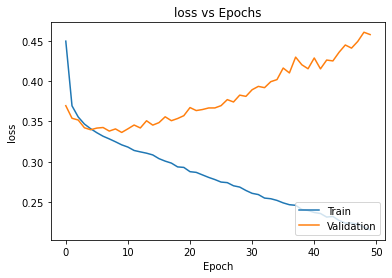

<IPython.core.display.Javascript object>

In [65]:
plt.plot(history_1.history["loss"])
plt.plot(history_1.history["val_loss"])
plt.title("loss vs Epochs")
plt.ylabel("loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="lower right")
plt.show()

* The model seems to be overfitted, as the distance between the train curve and validation curve started increasing after around 5 Epochs.

#### ROC-AUC curve

57/57 [==============================] - 0s 812us/step


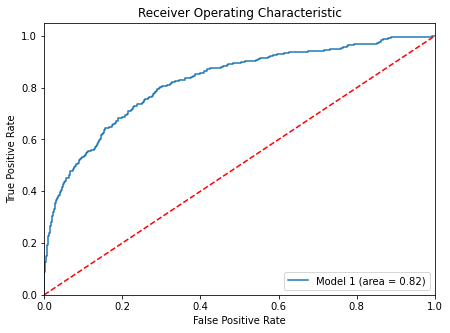

<IPython.core.display.Javascript object>

In [66]:
m1_roc_auc_train = roc_auc_score(y_val, model_1.predict(X_val))
m1_fpr, m1_tpr, m1_thresholds = roc_curve(y_val, model_1.predict(X_val))
plt.figure(figsize=(7, 5))
plt.plot(m1_fpr, m1_tpr, label="Model 1 (area = %0.2f)" % m1_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.show()

In [67]:
#### Optimal threshold using AUC-ROC curve
m1_optimal_idx = np.argmax(m1_tpr - m1_fpr)
m1_optimal_threshold_auc_roc = m1_thresholds[m1_optimal_idx]
print(m1_optimal_threshold_auc_roc)

0.09780673


<IPython.core.display.Javascript object>

#### Precision-Recall curve 

57/57 [==============================] - 0s 1ms/step


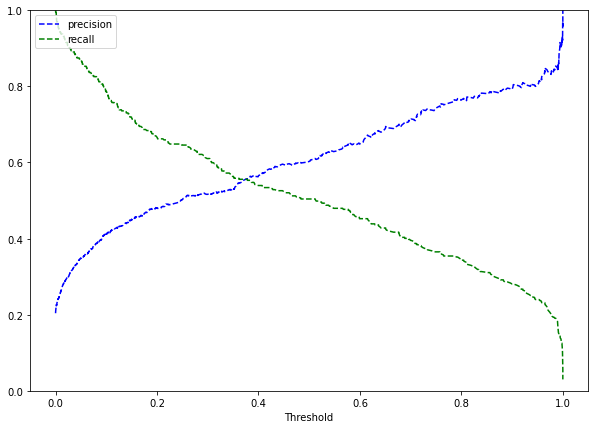

<IPython.core.display.Javascript object>

In [68]:
m1_y_pred = model_1.predict(X_val)
m1_prec, m1_rec, m1_tre = precision_recall_curve(y_val, m1_y_pred,)
plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(m1_prec, m1_rec, m1_tre)
plt.show()

In [69]:
# Define optimal threshold
for i, tre_value in enumerate(m1_tre):
    prec_value = float(format(m1_prec[i], "0.4f"))
    rec_value = float(format(m1_rec[i], "0.4f"))
    if prec_value == rec_value:
        print(tre_value, rec_value)
        m1_optimal_threshold_prec_rec = tre_value

0.37425187 0.5559


<IPython.core.display.Javascript object>

#### Checking model performance with optimal threshold from AUC-ROC

57/57 [==============================] - 0s 1ms/step


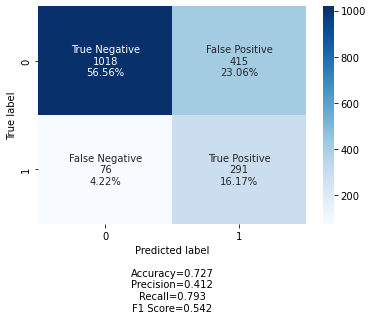

<IPython.core.display.Javascript object>

In [70]:
# creating confusion matrix
confusion_matrix_sklearn(model_1, X_val, y_val, threshold=m1_optimal_threshold_auc_roc)

#### Checking model performance with optimal threshold from Precision-Recall curve 

57/57 [==============================] - 0s 1ms/step


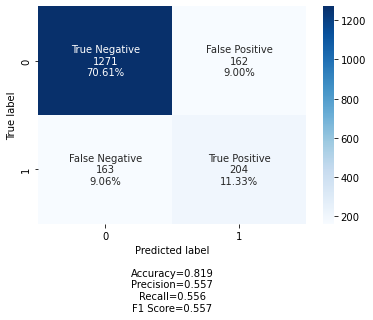

<IPython.core.display.Javascript object>

In [71]:
# creating confusion matrix
confusion_matrix_sklearn(model_1, X_val, y_val, threshold=m1_optimal_threshold_prec_rec)

In [72]:
# creating performance table
model_1_val_perf = model_performance_classification_sklearn(
    model_1, X_val, y_val, threshold=m1_optimal_threshold_auc_roc
)

57/57 [==============================] - 0s 998us/step


<IPython.core.display.Javascript object>

#### Summary of Model 1

* Since recall is a more important metric, threshold optimazation using a ROC-AUC curve with a higher recall score is more suitable.
* While recall isn't bad at 0.793, Precision is low at 0.412 in the validation set.
* During the model training process, it has been observed that overfitting of the training set occurs above a certain amount of Epoches, resulting in a decrease in validation performance. This can be improved by ending model training before it becomes overfit.
* Given the noise in the training process, it seems appropriate to set the learning rate lower.
* Since Model 1 is overfitting to the training set, there is a possibility that performance will be improved through some regularization techniques (i.e. Drop out, Batch normalization) that prevent overfitting.

### Model 2 - Early stopping & Drop out

#### Model building

In [73]:
backend.clear_session()
# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(1)
random.seed(1)
tf.random.set_seed(1)

<IPython.core.display.Javascript object>

In [74]:
# Initializing the model
model_2 = Sequential()
# Adding input layer with 64 neurons, relu as activation function and, he_uniform as weight initializer.
model_2.add(
    Dense(64, activation="relu", kernel_initializer="he_uniform", input_shape=(19,))
)
# Adding Dropout with 20%
model_2.add(Dropout(0.2))
# Adding the first hidden layer with 32 neurons, relu as activation function and, he_uniform as weight initializer
model_2.add(Dense(32, activation="relu", kernel_initializer="he_uniform"))
# Adding Dropout with 10%
model_2.add(Dropout(0.1))
# Adding the second hidden layer with 32 neurons, relu as activation function and, he_uniform as weight initializer
model_2.add(Dense(32, activation="relu", kernel_initializer="he_uniform"))
# Adding the output layer with one neuron and sigmoid as activation
model_2.add(Dense(1, activation="sigmoid"))  # binary classification (exit or not)

<IPython.core.display.Javascript object>

In [75]:
# Model summary
model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1280      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 4,449
Trainable params: 4,449
Non-trainabl

<IPython.core.display.Javascript object>

In [76]:
# Initializing the Optimizer
adam = Adam(lr=1e-3)
# Compiling the model with 'binary cross-entropy' as loss function and metrics
model_2.compile(
    optimizer=adam, loss="binary_crossentropy", metrics=["Recall"],
)
# Defining Early stopping
es_cb = callbacks.EarlyStopping(monitor="val_loss", min_delta=0.001, patience=10)
# fitting the model
history_2 = model_2.fit(
    X_train, y_train, epochs=50, validation_data=(X_val, y_val), callbacks=es_cb
)

Epoch 1/50
225/225 [==============================] - 1s 2ms/step - loss: 0.4847 - recall: 0.0859 - val_loss: 0.3944 - val_recall: 0.1580
Epoch 2/50
225/225 [==============================] - 0s 2ms/step - loss: 0.4064 - recall: 0.2851 - val_loss: 0.3651 - val_recall: 0.3597
Epoch 3/50
225/225 [==============================] - 0s 1ms/step - loss: 0.3855 - recall: 0.4011 - val_loss: 0.3561 - val_recall: 0.4033
Epoch 4/50
225/225 [==============================] - 0s 2ms/step - loss: 0.3740 - recall: 0.4127 - val_loss: 0.3472 - val_recall: 0.4550
Epoch 5/50
225/225 [==============================] - 0s 1ms/step - loss: 0.3674 - recall: 0.4216 - val_loss: 0.3499 - val_recall: 0.4332
Epoch 6/50
225/225 [==============================] - 0s 1ms/step - loss: 0.3666 - recall: 0.4338 - val_loss: 0.3466 - val_recall: 0.4387
Epoch 7/50
225/225 [==============================] - 0s 1ms/step - loss: 0.3614 - recall: 0.4352 - val_loss: 0.3482 - val_recall: 0.4278
Epoch 8/50
225/225 [==============

<IPython.core.display.Javascript object>

#### LOSS vs Epochs

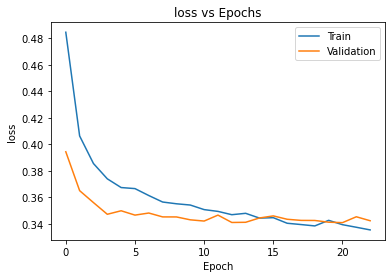

<IPython.core.display.Javascript object>

In [77]:
plt.plot(history_2.history["loss"])
plt.plot(history_2.history["val_loss"])
plt.title("loss vs Epochs")
plt.ylabel("loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper right")
plt.show()

#### ROC-AUC curve

57/57 [==============================] - 0s 1ms/step


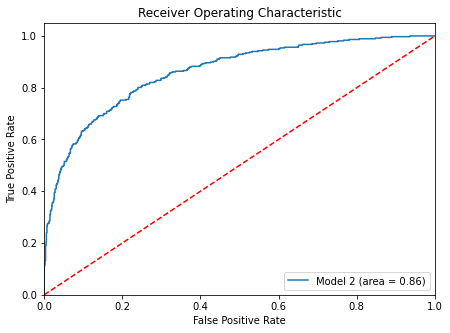

<IPython.core.display.Javascript object>

In [78]:
m2_roc_auc_train = roc_auc_score(y_val, model_2.predict(X_val))
m2_fpr, m2_tpr, m2_thresholds = roc_curve(y_val, model_2.predict(X_val))
plt.figure(figsize=(7, 5))
plt.plot(m2_fpr, m2_tpr, label="Model 2 (area = %0.2f)" % m2_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.show()

In [79]:
#### Optimal threshold using AUC-ROC curve
m2_optimal_idx = np.argmax(m2_tpr - m2_fpr)
m2_optimal_threshold_auc_roc = m2_thresholds[m2_optimal_idx]
print(m2_optimal_threshold_auc_roc)

0.17287493


<IPython.core.display.Javascript object>

#### Precision-Recall curve 

57/57 [==============================] - 0s 863us/step


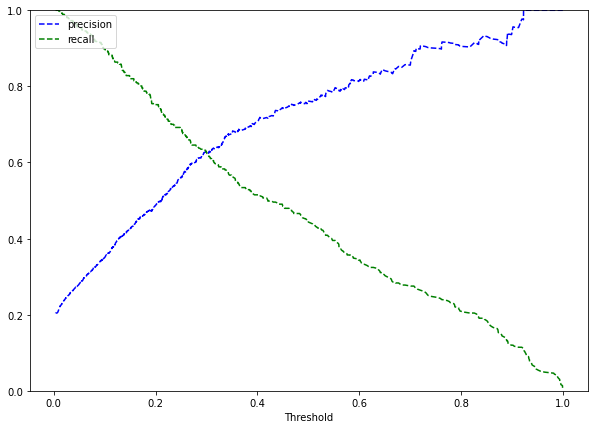

<IPython.core.display.Javascript object>

In [80]:
m2_y_pred = model_2.predict(X_val)
m2_prec, m2_rec, m2_tre = precision_recall_curve(y_val, m2_y_pred,)
plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(m2_prec, m2_rec, m2_tre)
plt.show()

In [81]:
# Define optimal threshold
for i, tre_value in enumerate(m2_tre):
    prec_value = float(format(m2_prec[i], "0.4f"))
    rec_value = float(format(m2_rec[i], "0.4f"))
    if prec_value == rec_value:
        print(tre_value, rec_value)
        m2_optimal_threshold_prec_rec = tre_value

0.29909363 0.6267


<IPython.core.display.Javascript object>

#### Checking model performance with optimal threshold from AUC-ROC

57/57 [==============================] - 0s 926us/step


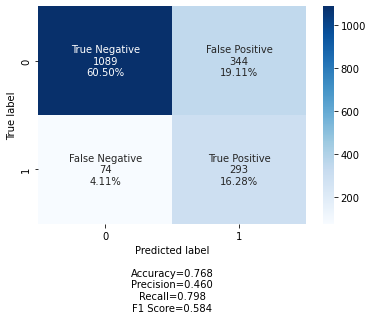

<IPython.core.display.Javascript object>

In [82]:
# creating confusion matrix
confusion_matrix_sklearn(model_2, X_val, y_val, threshold=m2_optimal_threshold_auc_roc)
# creating performance table

In [83]:
model_2_val_perf = model_performance_classification_sklearn(
    model_2, X_val, y_val, threshold=m2_optimal_threshold_auc_roc
)

57/57 [==============================] - 0s 1ms/step


<IPython.core.display.Javascript object>

#### Summary of Model 2

* The model 2 is not overfitting to the training set.
* The recall of model 2 is 0.815 and precision is 0.449 in the validation set.
* Both recall and precision have risen compared to before applying drop out.
* It is possible to try to improve performance by adjusting the number of hidden layers in the current way.

### Model 3 - Early stopping & Batch normalization

#### Model building

In [84]:
backend.clear_session()
# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(1)
random.seed(1)
tf.random.set_seed(1)

<IPython.core.display.Javascript object>

In [85]:
# Initializing the model
model_3 = Sequential()
# Adding input layer with 64 neurons, relu as activation function and, he_uniform as weight initializer.
model_3.add(
    Dense(64, activation="relu", kernel_initializer="he_uniform", input_shape=(19,))
)
# Adding Batch Normalization
model_3.add(BatchNormalization())
# Adding the first hidden layer with 32 neurons, relu as activation function and, he_uniform as weight initializer
model_3.add(Dense(32, activation="relu", kernel_initializer="he_uniform"))
# Adding Batch Normalization
model_3.add(BatchNormalization())
# Adding the second hidden layer with 32 neurons, relu as activation function and, he_uniform as weight initializer
model_3.add(Dense(32, activation="relu", kernel_initializer="he_uniform"))
# Adding Batch Normalization
model_3.add(BatchNormalization())
# Adding the output layer with one neuron and sigmoid as activation
model_3.add(Dense(1, activation="sigmoid"))  # binary classification (exit or not)

<IPython.core.display.Javascript object>

In [86]:
# Model summary
model_3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1280      
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 batch_normalization_1 (Batc  (None, 32)               128       
 hNormalization)                                                 
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 batch_normalization_2 (Batc  (None, 32)               1

<IPython.core.display.Javascript object>

In [87]:
# Initializing the Optimizer
adam = Adam(
    lr=1e-4
)  # In view of the fact that the training set was still overfitted with 1e-3 of learning rate, it was adjusted to 1e-4.
# Compiling the model with 'binary cross-entropy' as loss function and metrics
model_3.compile(
    optimizer=adam, loss="binary_crossentropy", metrics=["Recall"],
)
# Defining Early stopping
es_cb = callbacks.EarlyStopping(monitor="val_loss", min_delta=0.001, patience=10)
# fitting the model
history_3 = model_3.fit(
    X_train, y_train, epochs=50, validation_data=(X_val, y_val), callbacks=es_cb
)

Epoch 1/50
225/225 [==============================] - 2s 3ms/step - loss: 0.7996 - recall: 0.4884 - val_loss: 0.6962 - val_recall: 0.5041
Epoch 2/50
225/225 [==============================] - 1s 3ms/step - loss: 0.6756 - recall: 0.5034 - val_loss: 0.6155 - val_recall: 0.5041
Epoch 3/50
225/225 [==============================] - 1s 3ms/step - loss: 0.6005 - recall: 0.5443 - val_loss: 0.5579 - val_recall: 0.5068
Epoch 4/50
225/225 [==============================] - 1s 3ms/step - loss: 0.5523 - recall: 0.5416 - val_loss: 0.5177 - val_recall: 0.5232
Epoch 5/50
225/225 [==============================] - 1s 2ms/step - loss: 0.5128 - recall: 0.5184 - val_loss: 0.4834 - val_recall: 0.5232
Epoch 6/50
225/225 [==============================] - 0s 2ms/step - loss: 0.4881 - recall: 0.5007 - val_loss: 0.4586 - val_recall: 0.5123
Epoch 7/50
225/225 [==============================] - 0s 2ms/step - loss: 0.4623 - recall: 0.4986 - val_loss: 0.4377 - val_recall: 0.4986
Epoch 8/50
225/225 [==============

<IPython.core.display.Javascript object>

#### LOSS vs Epochs

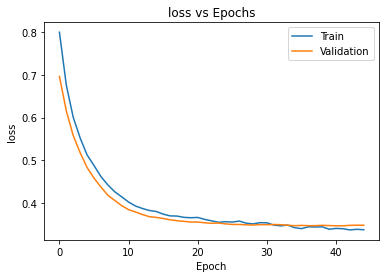

<IPython.core.display.Javascript object>

In [88]:
plt.plot(history_3.history["loss"])
plt.plot(history_3.history["val_loss"])
plt.title("loss vs Epochs")
plt.ylabel("loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper right")
plt.show()

#### ROC-AUC curve

57/57 [==============================] - 0s 953us/step


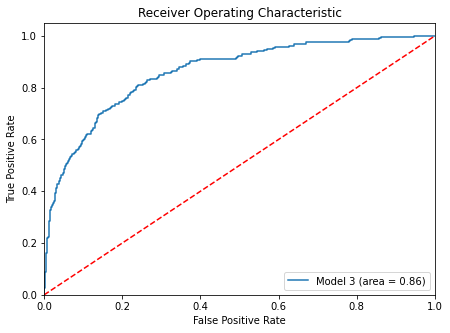

<IPython.core.display.Javascript object>

In [89]:
m3_roc_auc_train = roc_auc_score(y_val, model_3.predict(X_val))
m3_fpr, m3_tpr, m3_thresholds = roc_curve(y_val, model_3.predict(X_val))
plt.figure(figsize=(7, 5))
plt.plot(m3_fpr, m3_tpr, label="Model 3 (area = %0.2f)" % m3_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.show()

In [90]:
#### Optimal threshold using AUC-ROC curve
m3_optimal_idx = np.argmax(m3_tpr - m3_fpr)
m3_optimal_threshold_auc_roc = m3_thresholds[m3_optimal_idx]
print(m3_optimal_threshold_auc_roc)

0.17416765


<IPython.core.display.Javascript object>

#### Precision-Recall curve 

57/57 [==============================] - 0s 1ms/step


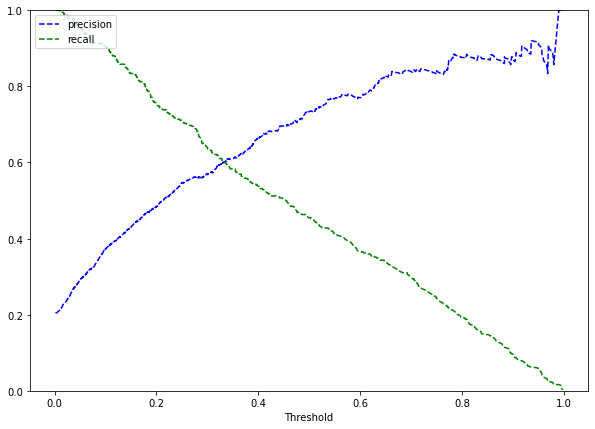

<IPython.core.display.Javascript object>

In [91]:
m3_y_pred = model_3.predict(X_val)
m3_prec, m3_rec, m3_tre = precision_recall_curve(y_val, m3_y_pred,)
plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(m3_prec, m3_rec, m3_tre)
plt.show()

In [92]:
# Define optimal threshold
for i, tre_value in enumerate(m3_tre):
    prec_value = float(format(m3_prec[i], "0.4f"))
    rec_value = float(format(m3_rec[i], "0.4f"))
    if prec_value == rec_value:
        print(tre_value, rec_value)
        m3_optimal_threshold_prec_rec = tre_value

0.3312261 0.5995


<IPython.core.display.Javascript object>

#### Checking model performance with optimal threshold from AUC-ROC

57/57 [==============================] - 0s 892us/step


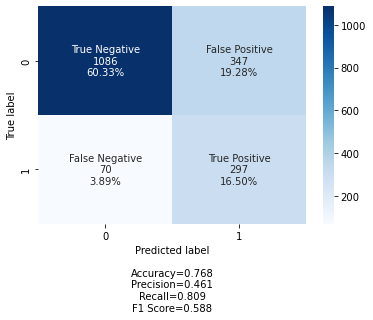

<IPython.core.display.Javascript object>

In [93]:
# creating confusion matrix
confusion_matrix_sklearn(model_3, X_val, y_val, threshold=m3_optimal_threshold_auc_roc)

In [94]:
model_3_val_perf = model_performance_classification_sklearn(
    model_3, X_val, y_val, threshold=m3_optimal_threshold_auc_roc
)

57/57 [==============================] - 0s 1ms/step


<IPython.core.display.Javascript object>

#### Summary of Model 3

* When training at a learning rate of 1e-3, it was still overfitting to the training set, and it was possible to avoid overfitting after changing the learning rate to 1e-4.
* The recall of model 3 is 0.809 and precision is 0.461 in the validation set.
* The model 3 is not overfitting to the training set.
* Both recall and precision have risen compared to before Regularization technique was applied.
* It is possible to try to improve performance by adjusting the number of hidden layers in the current way.

### Model 4 - Early stopping & Drop out & 3 hidden layers

#### Model building

In [95]:
backend.clear_session()
# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(1)
random.seed(1)
tf.random.set_seed(1)

<IPython.core.display.Javascript object>

In [96]:
# Initializing the model
model_4 = Sequential()
# Adding input layer with 128 neurons, relu as activation function and, he_uniform as weight initializer.
model_4.add(
    Dense(128, activation="relu", kernel_initializer="he_uniform", input_shape=(19,))
)
# Adding Dropout with 30%
model_4.add(Dropout(0.3))
# Adding the first hidden layer with 128 neurons, relu as activation function and, he_uniform as weight initializer
model_4.add(Dense(128, activation="relu", kernel_initializer="he_uniform"))
# Adding Dropout with 20%
model_4.add(Dropout(0.2))
# Adding the second hidden layer with 64 neurons, relu as activation function and, he_uniform as weight initializer
model_4.add(Dense(64, activation="relu", kernel_initializer="he_uniform"))
# Adding Dropout with 10%
model_4.add(Dropout(0.1))
# Adding the third hidden layer with 32 neurons, relu as activation function and, he_uniform as weight initializer
model_4.add(Dense(32, activation="relu", kernel_initializer="he_uniform"))
# Adding the output layer with one neuron and sigmoid as activation
model_4.add(Dense(1, activation="sigmoid"))  # binary classification (exit or not)

<IPython.core.display.Javascript object>

In [97]:
# Model summary
model_4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               2560      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 32)                2

<IPython.core.display.Javascript object>

In [98]:
# Initializing the Optimizer
adam = Adam(lr=1e-3)
# Compiling the model with 'binary cross-entropy' as loss function and metrics
model_4.compile(
    optimizer=adam, loss="binary_crossentropy", metrics=["Recall"],
)
# Defining Early stopping
es_cb = callbacks.EarlyStopping(monitor="val_loss", min_delta=0.001, patience=10)
# fitting the model
history_4 = model_4.fit(
    X_train, y_train, epochs=50, validation_data=(X_val, y_val), callbacks=es_cb
)

Epoch 1/50
225/225 [==============================] - 1s 3ms/step - loss: 0.4702 - recall: 0.1630 - val_loss: 0.3799 - val_recall: 0.3488
Epoch 2/50
225/225 [==============================] - 0s 2ms/step - loss: 0.4079 - recall: 0.3308 - val_loss: 0.3627 - val_recall: 0.4060
Epoch 3/50
225/225 [==============================] - 0s 2ms/step - loss: 0.3892 - recall: 0.3793 - val_loss: 0.3602 - val_recall: 0.3869
Epoch 4/50
225/225 [==============================] - 0s 2ms/step - loss: 0.3791 - recall: 0.3936 - val_loss: 0.3511 - val_recall: 0.4441
Epoch 5/50
225/225 [==============================] - 0s 2ms/step - loss: 0.3696 - recall: 0.4250 - val_loss: 0.3498 - val_recall: 0.4414
Epoch 6/50
225/225 [==============================] - 0s 2ms/step - loss: 0.3666 - recall: 0.4127 - val_loss: 0.3532 - val_recall: 0.4142
Epoch 7/50
225/225 [==============================] - 0s 2ms/step - loss: 0.3664 - recall: 0.4345 - val_loss: 0.3539 - val_recall: 0.4114
Epoch 8/50
225/225 [==============

<IPython.core.display.Javascript object>

#### LOSS vs Epochs

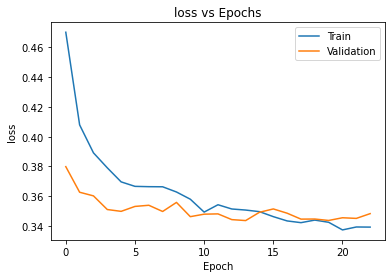

<IPython.core.display.Javascript object>

In [99]:
plt.plot(history_4.history["loss"])
plt.plot(history_4.history["val_loss"])
plt.title("loss vs Epochs")
plt.ylabel("loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper right")
plt.show()

#### ROC-AUC curve

57/57 [==============================] - 0s 1ms/step


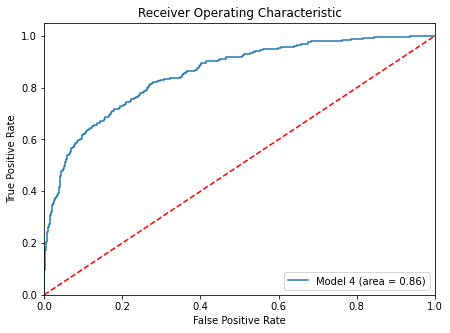

<IPython.core.display.Javascript object>

In [100]:
m4_roc_auc_train = roc_auc_score(y_val, model_4.predict(X_val))
m4_fpr, m4_tpr, m4_thresholds = roc_curve(y_val, model_4.predict(X_val))
plt.figure(figsize=(7, 5))
plt.plot(m4_fpr, m4_tpr, label="Model 4 (area = %0.2f)" % m4_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.show()

In [101]:
#### Optimal threshold using AUC-ROC curve
m4_optimal_idx = np.argmax(m4_tpr - m4_fpr)
m4_optimal_threshold_auc_roc = m4_thresholds[m4_optimal_idx]
print(m4_optimal_threshold_auc_roc)

0.184205


<IPython.core.display.Javascript object>

#### Precision-Recall curve 

57/57 [==============================] - 0s 1ms/step


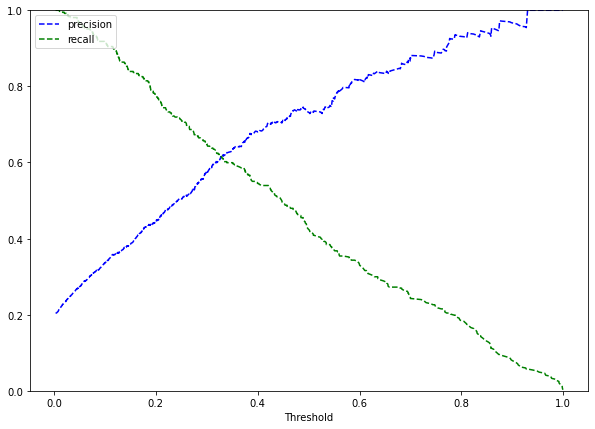

<IPython.core.display.Javascript object>

In [102]:
m4_y_pred = model_4.predict(X_val)
m4_prec, m4_rec, m4_tre = precision_recall_curve(y_val, m4_y_pred,)
plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(m4_prec, m4_rec, m4_tre)
plt.show()

In [103]:
# Define optimal threshold
for i, tre_value in enumerate(m4_tre):
    prec_value = float(format(m4_prec[i], "0.4f"))
    rec_value = float(format(m4_rec[i], "0.4f"))
    if prec_value == rec_value:
        print(tre_value, rec_value)
        m4_optimal_threshold_prec_rec = tre_value

0.32837787 0.6158


<IPython.core.display.Javascript object>

#### Checking model performance with optimal threshold from AUC-ROC

57/57 [==============================] - 0s 1ms/step


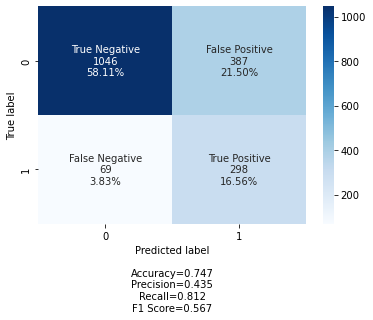

<IPython.core.display.Javascript object>

In [104]:
# creating confusion matrix
confusion_matrix_sklearn(model_4, X_val, y_val, threshold=m4_optimal_threshold_auc_roc)

In [105]:
model_4_val_perf = model_performance_classification_sklearn(
    model_4, X_val, y_val, threshold=m4_optimal_threshold_auc_roc
)

57/57 [==============================] - 0s 1ms/step


<IPython.core.display.Javascript object>

#### Summary of Model 4

* The model 4 is not overfitting to the training set.
* The recall of model 4 is 0.812 and precision is 0.435 in the validation set.
* Both recall and precision slightly reduced compared to before adding the hidden layer.

### Model 5 - Early stopping & Batch normalization & 3 hidden layers

#### Model building

In [106]:
backend.clear_session()
# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(1)
random.seed(1)
tf.random.set_seed(1)

<IPython.core.display.Javascript object>

In [107]:
# Initializing the model
model_5 = Sequential()
# Adding input layer with 128 neurons, relu as activation function and, he_uniform as weight initializer.
model_5.add(
    Dense(128, activation="relu", kernel_initializer="he_uniform", input_shape=(19,))
)
# Adding Batch Normalization
model_5.add(BatchNormalization())
# Adding the first hidden layer with 64 neurons, relu as activation function and, he_uniform as weight initializer
model_5.add(Dense(128, activation="relu", kernel_initializer="he_uniform"))
# Adding Batch Normalization
model_5.add(BatchNormalization())
# Adding the first hidden layer with 64 neurons, relu as activation function and, he_uniform as weight initializer
model_5.add(Dense(64, activation="relu", kernel_initializer="he_uniform"))
# Adding Batch Normalization
model_5.add(BatchNormalization())
# Adding the second hidden layer with 32 neurons, relu as activation function and, he_uniform as weight initializer
model_5.add(Dense(32, activation="relu", kernel_initializer="he_uniform"))
# Adding the output layer with one neuron and sigmoid as activation
model_5.add(Dense(1, activation="sigmoid"))  # binary classification (exit or not)

<IPython.core.display.Javascript object>

In [108]:
# Model summary
model_5.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               2560      
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 batch_normalization_1 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 batch_normalization_2 (Batc  (None, 64)               2

<IPython.core.display.Javascript object>

In [109]:
# Initializing the Optimizer
adam = Adam(lr=1e-4)
# Compiling the model with 'binary cross-entropy' as loss function and metrics
model_5.compile(
    optimizer=adam, loss="binary_crossentropy", metrics=["Recall"],
)
# Defining Early stopping
es_cb = callbacks.EarlyStopping(monitor="val_loss", min_delta=0.001, patience=10)
# fitting the model
history_5 = model_5.fit(
    X_train, y_train, epochs=50, validation_data=(X_val, y_val), callbacks=es_cb
)

Epoch 1/50
225/225 [==============================] - 2s 4ms/step - loss: 0.6731 - recall: 0.4993 - val_loss: 0.5007 - val_recall: 0.2970
Epoch 2/50
225/225 [==============================] - 1s 3ms/step - loss: 0.4652 - recall: 0.3472 - val_loss: 0.4266 - val_recall: 0.3297
Epoch 3/50
225/225 [==============================] - 1s 3ms/step - loss: 0.4175 - recall: 0.3656 - val_loss: 0.4007 - val_recall: 0.3488
Epoch 4/50
225/225 [==============================] - 1s 3ms/step - loss: 0.4013 - recall: 0.3568 - val_loss: 0.3872 - val_recall: 0.3896
Epoch 5/50
225/225 [==============================] - 1s 3ms/step - loss: 0.3883 - recall: 0.3854 - val_loss: 0.3789 - val_recall: 0.3896
Epoch 6/50
225/225 [==============================] - 1s 3ms/step - loss: 0.3766 - recall: 0.4100 - val_loss: 0.3742 - val_recall: 0.4005
Epoch 7/50
225/225 [==============================] - 1s 3ms/step - loss: 0.3667 - recall: 0.4202 - val_loss: 0.3710 - val_recall: 0.4142
Epoch 8/50
225/225 [==============

<IPython.core.display.Javascript object>

#### LOSS vs Epochs

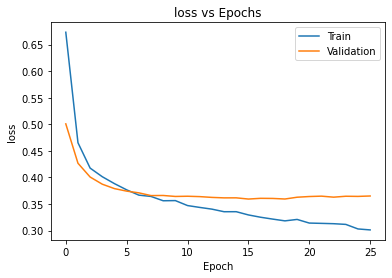

<IPython.core.display.Javascript object>

In [110]:
plt.plot(history_5.history["loss"])
plt.plot(history_5.history["val_loss"])
plt.title("loss vs Epochs")
plt.ylabel("loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper right")
plt.show()

#### ROC-AUC curve

57/57 [==============================] - 0s 1ms/step


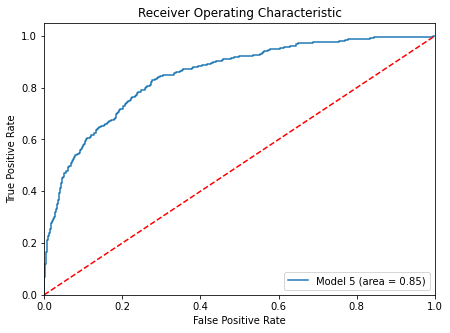

<IPython.core.display.Javascript object>

In [111]:
m5_roc_auc_train = roc_auc_score(y_val, model_5.predict(X_val))
m5_fpr, m5_tpr, m5_thresholds = roc_curve(y_val, model_5.predict(X_val))
plt.figure(figsize=(7, 5))
plt.plot(m5_fpr, m5_tpr, label="Model 5 (area = %0.2f)" % m5_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.show()

In [112]:
#### Optimal threshold using AUC-ROC curve
m5_optimal_idx = np.argmax(m5_tpr - m5_fpr)
m5_optimal_threshold_auc_roc = m5_thresholds[m5_optimal_idx]
print(m5_optimal_threshold_auc_roc)

0.14089158


<IPython.core.display.Javascript object>

#### Precision-Recall curve 

57/57 [==============================] - 0s 1ms/step


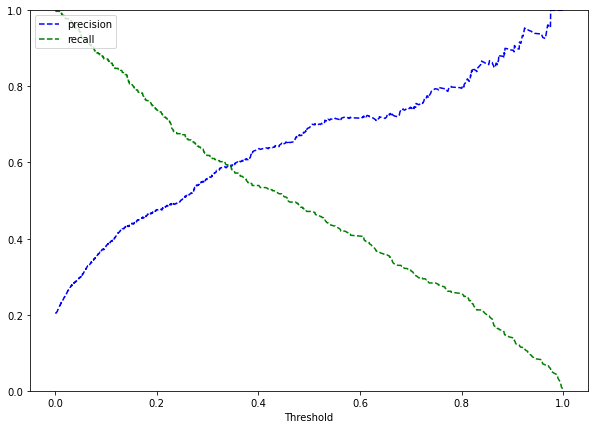

<IPython.core.display.Javascript object>

In [113]:
m5_y_pred = model_5.predict(X_val)
m5_prec, m5_rec, m5_tre = precision_recall_curve(y_val, m5_y_pred,)
plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(m5_prec, m5_rec, m5_tre)
plt.show()

In [114]:
# Define optimal threshold
for i, tre_value in enumerate(m5_tre):
    prec_value = float(format(m5_prec[i], "0.4f"))
    rec_value = float(format(m5_rec[i], "0.4f"))
    if prec_value == rec_value:
        print(tre_value, rec_value)
        m5_optimal_threshold_prec_rec = tre_value

0.345639 0.5913


<IPython.core.display.Javascript object>

#### Checking model performance with optimal threshold from AUC-ROC

57/57 [==============================] - 0s 1ms/step


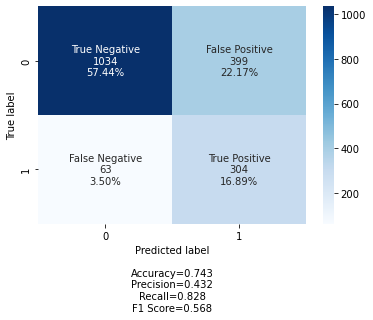

<IPython.core.display.Javascript object>

In [115]:
# creating confusion matrix
confusion_matrix_sklearn(model_5, X_val, y_val, threshold=m5_optimal_threshold_auc_roc)

In [116]:
model_5_val_perf = model_performance_classification_sklearn(
    model_5, X_val, y_val, threshold=m5_optimal_threshold_auc_roc
)

57/57 [==============================] - 0s 1ms/step


<IPython.core.display.Javascript object>

#### Summary of Model 5

* When training at a learning rate of 1e-3, it was still overfitting to the training set, and it was possible to avoid overfitting after changing the learning rate to 1e-4.
* The recall of model 5 is 0.809 and precision is 0.461 in the validation set.
* The model 3 is slightly overfitting to the training set.
* Both recall and precision have risen compared to before batch normalization was applied.
* Performance improvements can be attempted by adjusting hyper parameters.

### Model Performace Summary

In [117]:
models_val_comp_df = pd.concat(
    [
        model_1_val_perf.T,
        model_2_val_perf.T,
        model_3_val_perf.T,
        model_4_val_perf.T,
        model_5_val_perf.T,
    ],
    axis=1,
)
models_val_comp_df.columns = [
    "2 Hidden layers",
    "Early stopping & Drop out & 2 Hidden layers",
    "Early stopping & Batch norm & 2 Hidden layers",
    "Early stopping & Drop out & 3 Hidden layers",
    "Early stopping & Batch norm & 3 Hidden layers",
]

print("Validation performance comparison:")
models_val_comp_df

Validation performance comparison:


,2 Hidden layers,Early stopping & Drop out & 2 Hidden layers,Early stopping & Batch norm & 2 Hidden layers,Early stopping & Drop out & 3 Hidden layers,Early stopping & Batch norm & 3 Hidden layers
Accuracy,0.727222,0.767778,0.768333,0.746667,0.743333
Recall,0.792916,0.798365,0.809264,0.811989,0.828338
Precision,0.412181,0.459969,0.461180,0.435036,0.432432
F1,0.542404,0.583665,0.587537,0.566540,0.568224


<IPython.core.display.Javascript object>

* Since the recall had to be maximized, model 5 was decided to be the final model.

### Final model ( Model 5 )

#### Parameters

* Input layer with 128 neurons, 
* 3 hidden layers (128, 64, 32 neurons)
* ReLU activation function and He weight initialization
* Early stopping
* Batch normalization
* optimized threshold from ROC-AUC curve
* 1e-4 of learning rate

#### Model performance on test set

32/32 [==============================] - 0s 1ms/step


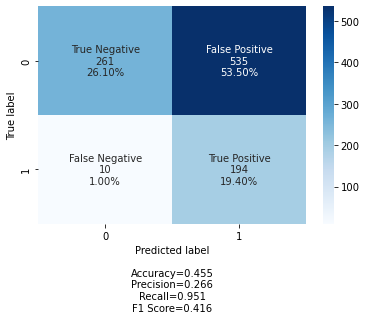

<IPython.core.display.Javascript object>

In [118]:
# creating confusion matrix
confusion_matrix_sklearn(
    model_5, X_test, y_test, threshold=m5_optimal_threshold_auc_roc
)

* The recall of the final model is 0.951 and precision is 0.266 in the test set.
* In the test set, recall was greatly improved, while precision was reduced.

## Conclusion

* The bank churn rate of customers living in Germany is higher than that of customers living in other regions.


* The bank churn rate of customers in their 40s and 60s was observed to be higher than that of other age groups. In particular, customers in their 50s had the highest churn rate.


* It was observed that the bank churn rate of inactive customers was higher, and active bank churn was observed among inactive customers in their 50s and 60s.


* The neural network model with recall 0.951 precision 0.266 was built.


* The overfitting to the train set could be prevented through batch normalization.


* The performance of the model could be improved through early stopping and threshold optimization.


* Performance could be improved by increasing the number of hidden layers from 2 to 3.


## Business Recommendations

* Through the built model, customers who are likely to churn can be identified and monitored in advance.


* In the case of customers in their 50s, it is necessary to pay more attention because the inactivity of banking appears immediately as a result of bank churn.


* It is recommended to figure out what is inconvenient in using a bank in Germany compared to other regions.


* It is recommended to conduct a service complaint survey on customers in their 40s and 60s with a high churn rate and reflect the survey results.